In [1]:
import pandas as pd

data = pd.read_csv('./datasets/AB_NYC_2019.csv')

In [2]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=10)

In [4]:
train_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31162.000000,39116.000000,39116.000000
mean,1.901242e+07,6.745595e+07,40.728947,-73.952167,153.643241,7.036865,23.371664,1.368563,7.248338,113.052996
std,1.096827e+07,7.840465e+07,0.054644,0.046169,250.218204,20.145568,44.782103,1.682616,33.244145,131.623903
min,3.647000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.487151e+06,7.863369e+06,40.689977,-73.983053,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.964801e+07,3.067548e+07,40.723200,-73.955580,107.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.909086e+07,1.074344e+08,40.763160,-73.936170,177.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


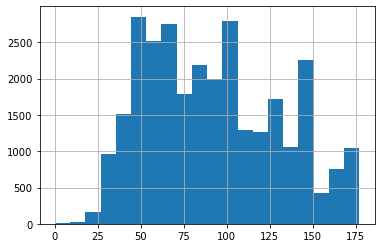

In [5]:
#chopping it off at the 75th percentile to get rid of outliers
pd.Series(np.array([x for x in train_data['price'] if x <= 177])).hist(bins=20)

In [6]:
train_data['minimum_nights'].quantile(.75)

5.0

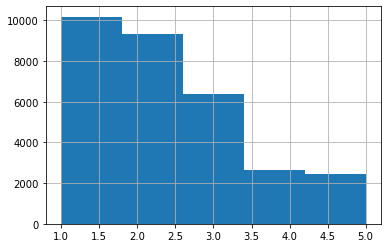

In [7]:
pd.Series(np.array([x for x in train_data['minimum_nights'] if x <= 5 ])).hist(bins=5)

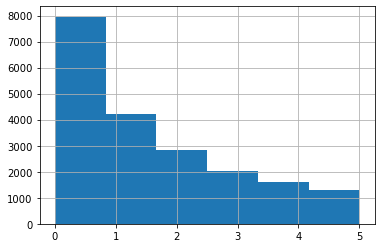

In [8]:
pd.Series(np.array([x for x in train_data['number_of_reviews'] if x <= 5 ])).hist(bins=6)

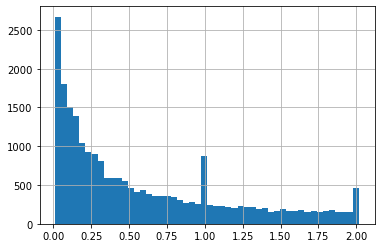

In [9]:
pd.Series(np.array([x for x in train_data['reviews_per_month'] if x <= 2.02 ])).hist(bins=50)

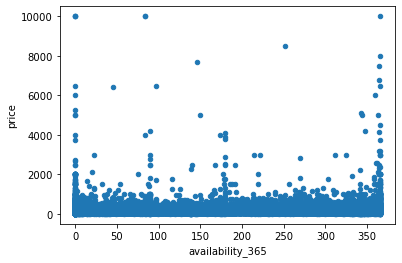

In [10]:
train_data.plot(kind='scatter', x='availability_365', y='price')

In [11]:
corr_matrix = train_data.corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081516
calculated_host_listings_count    0.053683
minimum_nights                    0.049278
latitude                          0.032457
host_id                           0.012366
id                                0.006278
reviews_per_month                -0.036235
number_of_reviews                -0.048712
longitude                        -0.144544
Name: price, dtype: float64

In [12]:
def remove_outliers(X):
    indeces = X[X['price']>X['price'].quantile(.75)].index
    X.drop(indeces, inplace=True)
    return X

In [13]:
s_train = remove_outliers(train_data)
s_train.describe()

z:\computer science\dataprojects\venv\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.935800e+04,2.935800e+04,29358.000000,29358.000000,29358.000000,29358.000000,29358.000000,24065.000000,29358.000000,29358.000000
mean,1.879391e+07,6.576766e+07,40.727225,-73.945634,92.262211,6.624293,25.153961,1.397402,3.891239,104.514511
std,1.074534e+07,7.609922e+07,0.058378,0.047433,39.189760,17.993464,47.068723,1.734794,16.737788,128.184536
min,3.647000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.535400e+06,8.141256e+06,40.686602,-73.974520,60.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.938749e+07,3.145938e+07,40.717795,-73.950260,88.000000,2.000000,6.000000,0.720000,1.000000,35.000000
75%,2.835741e+07,1.037268e+08,40.764557,-73.928160,121.000000,5.000000,26.000000,2.070000,2.000000,197.000000
max,3.648724e+07,2.742733e+08,40.913060,-73.712990,177.000000,999.000000,629.000000,58.500000,327.000000,365.000000


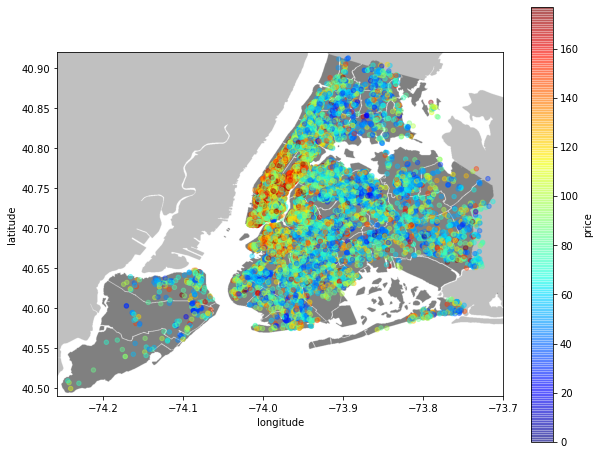

In [14]:
import matplotlib.pyplot as plt
import urllib

plt.figure(figsize=(10,8))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

plt.imshow(nyc_img,extent=[-74.258, -73.7, 40.49, 40.92])
ax=plt.gca()

s_train.plot(kind='scatter', x='longitude', y='latitude', ax=ax, alpha=0.4, c='price',
       cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.show()

Better exploration moving from left to right on the different columns

In [15]:
train_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
top_hosts = train_data.host_id.value_counts().head(10)

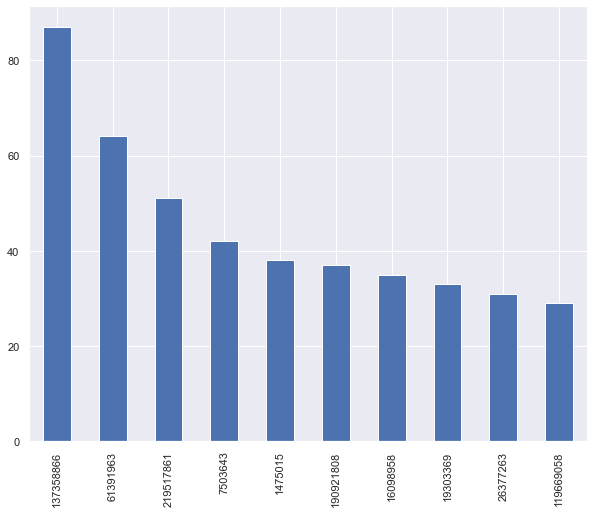

In [26]:
top_hosts.plot(kind='bar')

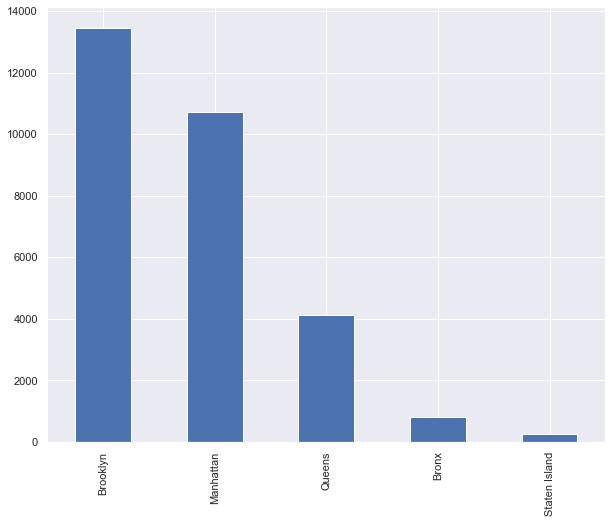

In [29]:
train_data['neighbourhood_group'].value_counts().plot(kind='bar')

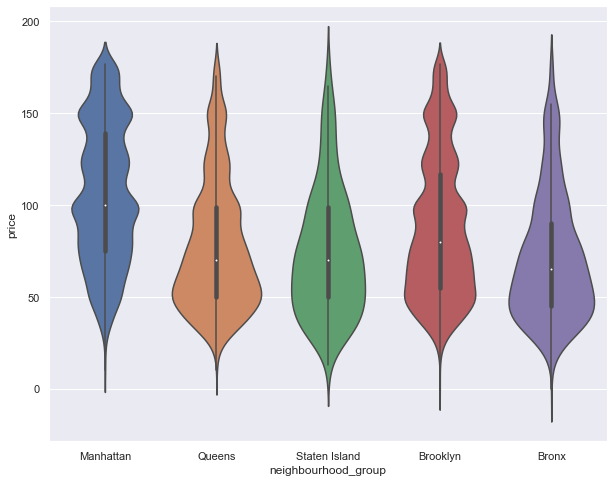

In [37]:
viz_2=sns.violinplot(data=train_data, x='neighbourhood_group', y='price')